In [7]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import allan_variance
np.random.seed(0)
import pandas as pd

In [8]:
def read_txt(datafile):
    with open(datafile, "r") as file:
        lines = file.readlines()
        data = [[float(num) for num in line.split()] for line in lines]
    return data


In [9]:
EKF = np.array(read_txt("../data/EKF.txt"))
UKF = np.array(read_txt("../data/UKF.txt"))
dt = 0.01

DISIMU omega hat: quantization    0.00000000000000
white           0.00000000000000
flicker         0.00000000000000
walk            0.00042275580028
ramp            0.00007757528663
Name: 0, dtype: float64, quantization    0.00000000000000
white           0.00000000000000
flicker         0.00000000000000
walk            0.00039249829149
ramp            0.00001633268587
Name: 0, dtype: float64, quantization    0.00000000000000
white           0.00000000000000
flicker         0.00000000000000
walk            0.00039717446970
ramp            0.00009503207476
Name: 0, dtype: float64, quantization    0.00000000000000
white           0.00000000000000
flicker         0.00170893855632
walk            0.00059915134698
ramp            0.00000000000000
Name: 0, dtype: float64, quantization    0.00000000000000
white           0.00000000000000
flicker         0.00168960142298
walk            0.00052996260363
ramp            0.00025573766407
Name: 0, dtype: float64, quantization    0.00000000000000

Text(0, 0.5, 'Allan Variance ($\\hat{\\omega}$)')

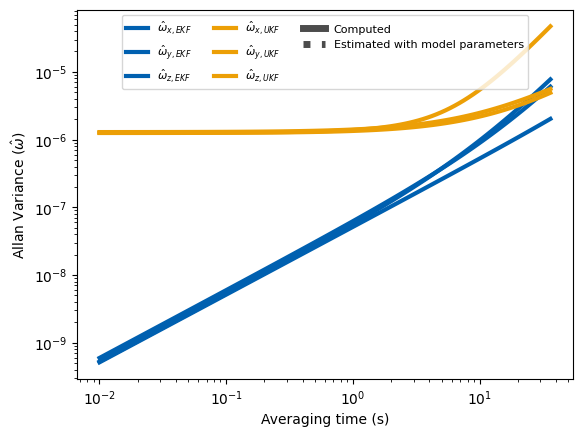

In [13]:
# DISIMU, omega hat
tau_wx_EKF, avar_wx_EKF = allan_variance.compute_avar(EKF[:,0], dt)
tau_wy_EKF, avar_wy_EKF = allan_variance.compute_avar(EKF[:,1], dt)
tau_wz_EKF, avar_wz_EKF = allan_variance.compute_avar(EKF[:,2], dt)
tau_wx_UKF, avar_wx_UKF = allan_variance.compute_avar(UKF[:,0], dt)
tau_wy_UKF, avar_wy_UKF = allan_variance.compute_avar(UKF[:,1], dt)
tau_wz_UKF, avar_wz_UKF = allan_variance.compute_avar(UKF[:,2], dt)
params_wx_EKF, avar_pred_wx_EKF = allan_variance.estimate_parameters(tau_wx_EKF, avar_wx_EKF)
params_wy_EKF, avar_pred_wy_EKF = allan_variance.estimate_parameters(tau_wy_EKF, avar_wy_EKF)
params_wz_EKF, avar_pred_wz_EKF = allan_variance.estimate_parameters(tau_wz_EKF, avar_wz_EKF)
params_wx_UKF, avar_pred_wx_UKF = allan_variance.estimate_parameters(tau_wx_UKF, avar_wx_UKF)
params_wy_UKF, avar_pred_wy_UKF = allan_variance.estimate_parameters(tau_wy_UKF, avar_wy_UKF)
params_wz_UKF, avar_pred_wz_UKF = allan_variance.estimate_parameters(tau_wz_UKF, avar_wz_UKF)
print(f"DISIMU omega hat: {params_wx_EKF}, {params_wy_EKF}, {params_wz_EKF}, {params_wx_UKF}, {params_wy_UKF}, {params_wz_UKF}")

# Computed
fig, ax = plt.subplots()
plt.loglog(tau_wx_EKF, avar_pred_wx_EKF, label="$\hat{\omega}_{x,EKF}$", linewidth=3, color = "#0060B0")
plt.loglog(tau_wy_EKF, avar_pred_wy_EKF, label="$\hat{\omega}_{y,EKF}$", linewidth=3, color = "#0060B0")
plt.loglog(tau_wz_EKF, avar_pred_wz_EKF, label="$\hat{\omega}_{z,EKF}$", linewidth=3, color = "#0060B0")
plt.loglog(tau_wx_UKF, avar_pred_wx_UKF, label="$\hat{\omega}_{x,UKF}$", linewidth=3, color = "#EC9F06")
plt.loglog(tau_wy_UKF, avar_pred_wy_UKF, label="$\hat{\omega}_{y,UKF}$", linewidth=3, color = "#EC9F06")
plt.loglog(tau_wz_UKF, avar_pred_wz_UKF, label="$\hat{\omega}_{z,UKF}$", linewidth=3, color = "#EC9F06")

# ax.set_ylim([0.00000001, 1])

line1, = plt.plot([], [], color='k', linestyle="-", alpha=0.7, linewidth=5, label='Computed')
line2, = plt.plot([], [], color='k', linestyle="dotted", alpha=0.7, linewidth=5, label='Estimated with model parameters')

plt.legend(ncol=3, fancybox=True, frameon=True, fontsize=8, loc='upper center')
plt.xlabel("Averaging time (s)")
plt.ylabel("Allan Variance ($\hat{\omega}$)")